# Importing Important Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Reading in Training data

In [34]:
data = pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [35]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Analysis and pre-processing

<Axes: xlabel='label', ylabel='count'>

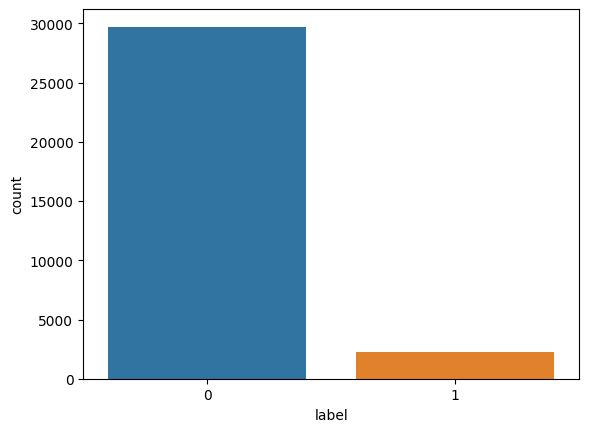

In [36]:
sns.countplot(x="label",data=data)


<BarContainer object of 2 artists>

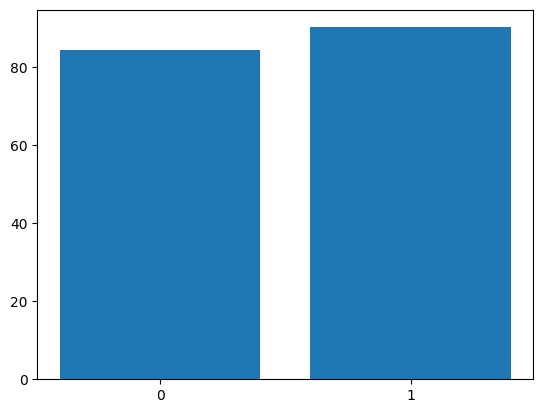

In [37]:
'''Analysing the avarage length of tweets per class'''
data_0 = data[data['label'] == 0]['tweet']
len_avg0 = sum([len(tweet) for tweet in data_0]) / len(data_0)

data_1 = data[data['label'] == 1]['tweet']
len_avg1 = sum([len(tweet) for tweet in data_1]) / len(data_1)

plt.bar(['0', '1'], [len_avg0, len_avg1])


# Forming the Corpus

In [38]:
corpus = []
for tweet in data['tweet']:
    corpus.append(tweet)

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Padding the Sequence

In [40]:
max_seq_len = max([len(i) for i in corpus])
input_sequences = []
for tweet in corpus:
    token_list = tokenizer.texts_to_sequences([tweet])[0] 
    input_sequences.append(token_list)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

# Train_test_split

In [41]:
labels = data['label'].values

In [42]:
split = int(.2 * len(corpus)) 
rand_row_num = np.random.randint(0, len(corpus), split)

X_test = np.array([input_sequences[i] for i in rand_row_num])
y_test = np.array([labels[i] for i in rand_row_num])

X_train = np.delete(input_sequences, rand_row_num, axis=0)
y_train = np.delete(labels, rand_row_num, axis=0)

In [43]:
len(X_train)

26180

In [44]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Model 

In [45]:
model = tf.keras.Sequential([
    layers.Embedding(total_words, 5, input_length=max_seq_len),
    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),
    layers.Dropout(0.2),
    layers.LSTM(8),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Callback

In [47]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10 ** epoch)

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

# Training

In [49]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, callbacks=[lr_scheduler])

Epoch 1/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.8900 - loss: 0.6905 - learning_rate: 1.0000e-06
Epoch 2/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 73s 177ms/step - accuracy: 0.9281 - loss: 0.6791 - learning_rate: 1.0000e-05
Epoch 3/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 73s 178ms/step - accuracy: 0.9284 - loss: 0.3859 - learning_rate: 1.0000e-04
Epoch 4/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 72s 177ms/step - accuracy: 0.9373 - loss: 0.2148 - learning_rate: 0.0010
Epoch 5/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 73s 178ms/step - accuracy: 0.9641 - loss: 0.1024 - learning_rate: 0.0100


In [55]:
model = tf.keras.Sequential([
    layers.Embedding(total_words, 5, input_length=max_seq_len),
    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),
    layers.Dropout(0.2),
    layers.LSTM(8),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 83s 179ms/step - accuracy: 0.9346 - loss: 0.2319
Epoch 2/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 73s 177ms/step - accuracy: 0.9824 - loss: 0.0534
Epoch 3/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - accuracy: 0.9934 - loss: 0.0207
Epoch 4/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - accuracy: 0.9979 - loss: 0.0085
Epoch 5/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 73s 178ms/step - accuracy: 0.9989 - loss: 0.0048


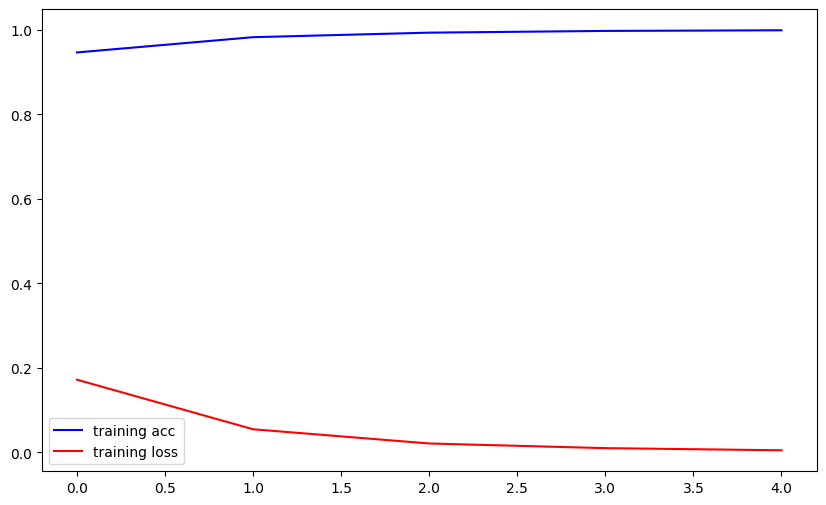

In [58]:
'''Visualizing training accuracy and loss per epoch to eliminate the potential threat of overfitting'''
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'], 'b', label='training acc')
plt.plot(np.arange(len(history.history['accuracy'])), history.history['loss'], 'r', label='training loss')
plt.legend(loc='best')
plt.show()

# Evaluating Model's performance with the validation set

In [59]:
model.evaluate(X_test, y_test, batch_size=64)

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9628 - loss: 0.2063


[0.23180851340293884, 0.9596370458602905]

In [60]:
y_test = np.array([labels[i] for i in rand_row_num])

## Creating the encoder dict to understand the pattern in the wrong predictions

In [61]:
encoder_dict = {val: key for key, val in tokenizer.word_index.items()}

In [62]:
preds = model.predict(X_test)
pre = []
for pred in preds:
    pre.append(np.argmax(pred))
pre = np.array(pre)
np.unique(pre, return_counts=True)

200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step


(array([0, 1]), array([5986,  406]))

In [63]:
'''Analysing false negative predictions'''
preds = model.predict(X_test)
for pred in range(len(preds)):
    temp = np.argmax(preds[pred])
    if temp != y_test[pred]:
        tweet = ''
        for word in X_test[pred]:
            if word == 0:
                continue
            else:
                tweet += encoder_dict[word]
                tweet += ' '
        print(tweet)
        print(f'predicted: {preds[pred]}\nactual: {y_test[pred]}')
        print('--------------------------------------------------')

200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step
ó¾£ she was a talented young lady 
predicted: [0.31127542 0.6887246 ]
actual: 0
--------------------------------------------------
user user user lolol user not a leb either ððððððððððð cow 
predicted: [0.98011595 0.01988402]
actual: 1
--------------------------------------------------
the stupidity of the alcoholic wiunion hags is the stuff of legend 
predicted: [0.9968271  0.00317293]
actual: 1
--------------------------------------------------
harbaugh had no time for stupid questions about bikinis thank you user no time 4 via user 
predicted: [0.9757819  0.02421803]
actual: 1
--------------------------------------------------
i wanna be fucked my id 13479 meet me here 
predicted: [0.99827355 0.00172648]
actual: 1
--------------------------------------------------
user love that your statements came from the man who was rebuked by voters in 2008 goodluckinnovember loser 
predicted: [2.7278721e-04 9.9972725e-